In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the data

In [2]:
data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now I have used pandas to load the data and now I will analyse that -

Is there anything wrong with the dataset?

Do I need to fix or remove any of the data?

Lets see:-

# Understanding the data

We have 7043 records with 21 different features including customer id and churn

In [19]:
data.shape

(7043, 21)

As we have noticed most of the columns are object type, but for developing model we need numeric values and some label encoding as well, so we will transform the data type in while manipulating the dataset.

In [13]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [46]:
#The most amazing thing I have seen is that there is not a single nan value in the dataset,and that makes me quite happy,hence we can move forward with the data.


data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
data.describe(include=np.object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,6941-KXRRV,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Here I am using a library called Pandas Profiling which gives us a lot of results in just a bit,from giving a overview of data to many type of correlations and many more.

In [23]:
from pandas_profiling import ProfileReport

In [25]:
profile = ProfileReport(data,title='Pandas Profiling Report',explorative=True)

In [26]:
profile.to_widgets()

In [30]:
for item in data.columns:
    print(item)
    print (data[item].unique())
    
    

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

# Data Manipulation

In [529]:
#dropping customerID column as it can cause errors while preproccessing
data.drop(['customerID'],axis=1,inplace=True)

In [530]:
X_cat = data.select_dtypes(include=['object'])
X_new=X_cat.iloc[:,0:15]

In [531]:
#Creating Dummy variable for Categorical variable which are of Object Type
val_x = pd.get_dummies(X_new,drop_first=True)
val_x.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [532]:
#Collecting column which are of int dtypes
X_n=data[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
X_n

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.5
7039,0,72,103.20,7362.9
7040,0,11,29.60,346.45
7041,1,4,74.40,306.6


In [533]:
#Mapping the churn column into numerical variable 
data['Churn'] = data['Churn'].map({'No':0, 'Yes':1})
output=data['Churn']
output

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [534]:
#CONCATENATING ALL THE THREE DATAFRAME FOR OUR FINAL DATAFRAME
newdf=pd.concat([val_x,X_n,output],axis=1)
newdf.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,29.85,29.85,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,34,56.95,1889.5,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,2,53.85,108.15,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,45,42.30,1840.75,0
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,2,70.70,151.65,1


In [ ]:
#Checking correlation between all the columns

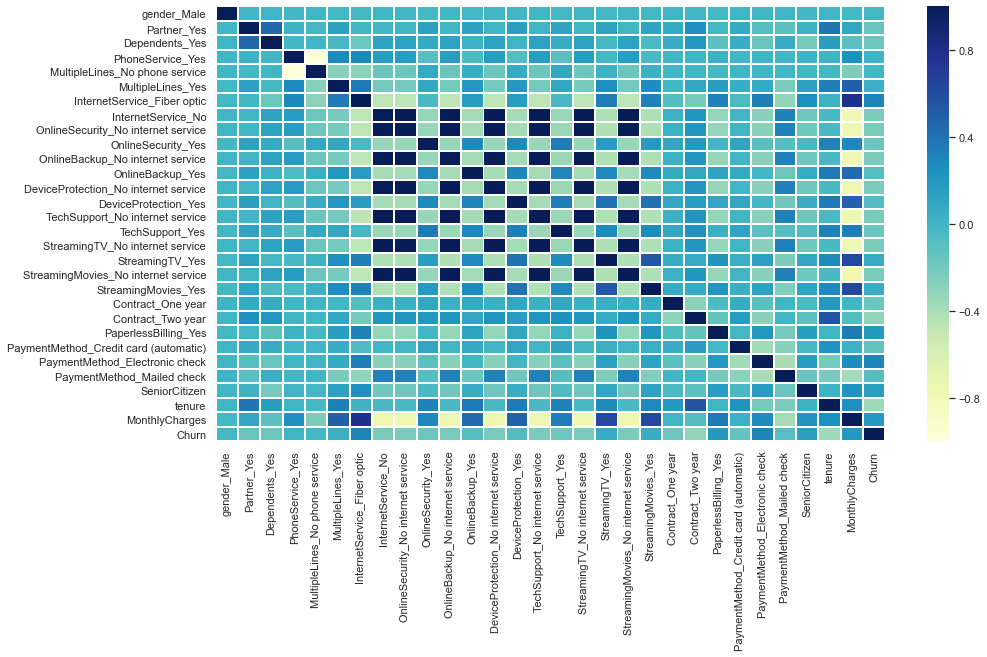

In [535]:
corrmat =newdf.corr() 
  
f, ax = plt.subplots(figsize =(15, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.9)

In [536]:
#Correlation with output variable
cor_target = abs(corrmat["Churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.0001]
relevant_features.sort_values(ascending=False)

Churn                                    1.000000
tenure                                   0.352229
InternetService_Fiber optic              0.308020
Contract_Two year                        0.302253
PaymentMethod_Electronic check           0.301919
StreamingMovies_No internet service      0.227890
InternetService_No                       0.227890
OnlineSecurity_No internet service       0.227890
OnlineBackup_No internet service         0.227890
DeviceProtection_No internet service     0.227890
StreamingTV_No internet service          0.227890
TechSupport_No internet service          0.227890
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
Contract_One year                        0.177820
OnlineSecurity_Yes                       0.171226
TechSupport_Yes                          0.164674
Dependents_Yes                           0.164221
SeniorCitizen                            0.150889
Partner_Yes                              0.150448


Dropping less correlated columns with correlation less tha 0.10

In [537]:
newdf.drop(['PaymentMethod_Mailed check','OnlineBackup_Yes','DeviceProtection_Yes','StreamingTV_Yes','StreamingMovies_Yes','MultipleLines_Yes','MultipleLines_No phone service','PhoneService_Yes','gender_Male'],axis=1,inplace=True)

In [32]:
newdf.shape

(7043, 13)

In [ ]:
#As some of the points in TotalCharges columns were blank so I filled the black values with np.nan and then replaced the nanvalues with the mean of the column. 
x.replace(' ', np.nan, inplace=True)
d=x[pd.to_numeric(x.TotalCharges, errors='coerce').isnull()]
d

In [ ]:
#Changing the data type of TotalCharges from object to float
x.TotalCharges=x.TotalCharges.astype(float)

In [ ]:
#filling the nan values with the mean of the columns.
x.TotalCharges.fillna((x.TotalCharges.mean()), inplace=True)

In [ ]:
#I have separated the data in X and Y for our machine learning model.
x=newdf.iloc[:,0:21]
y=newdf['Churn']

We split the data in train and test data because by spitting a dataset into training and testing subsets, we can train our model on the training subset, and then feed it with unseen data from the test subset to evaluate the performance of our model.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Data Visualization

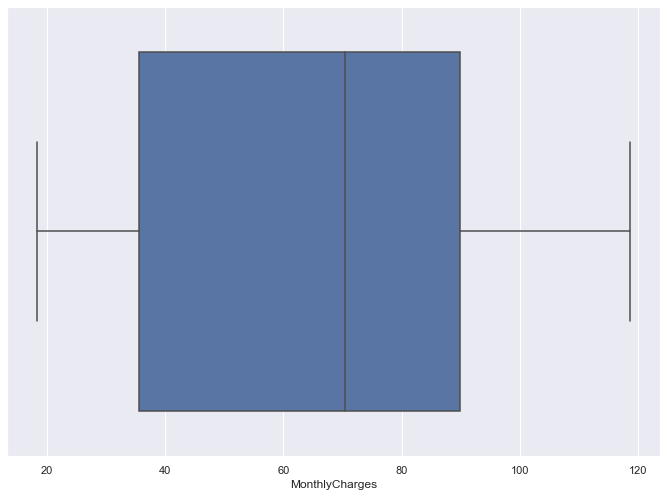

In [70]:
#Checking outlier in monthly charges columns
#and the consistency of the data
import seaborn as sns
sns.boxplot(x=data['MonthlyCharges'])

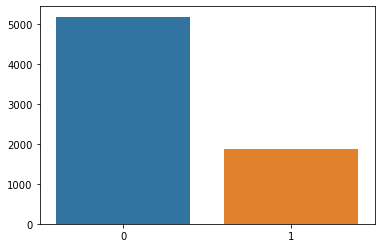

In [8]:
#Checking the churn rate for teh data
y = newdf["Churn"].value_counts()
sns.barplot(y.index, y.values)

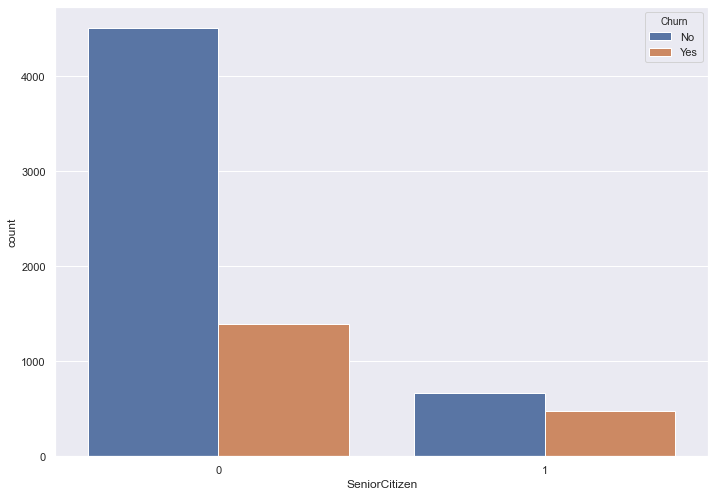

In [64]:
#Senior Citizen are likely to got churn 
sns.countplot(x='SeniorCitizen', hue='Churn', data=data,orient='v')

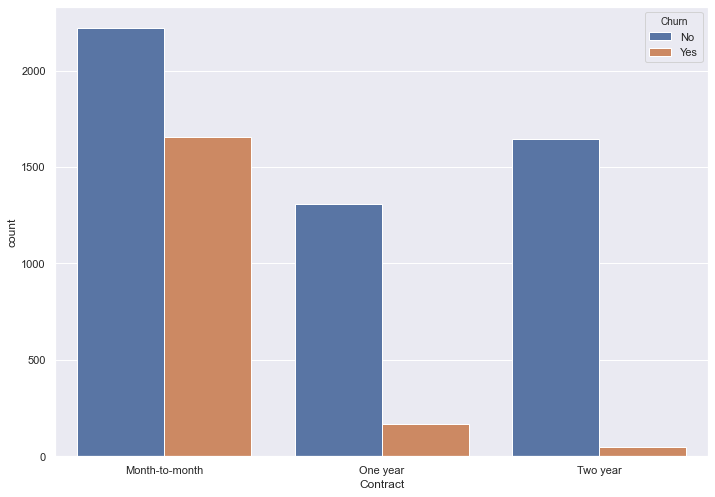

In [58]:
#contract vs churn graph
sns.countplot(x='Contract', hue='Churn', data=data);

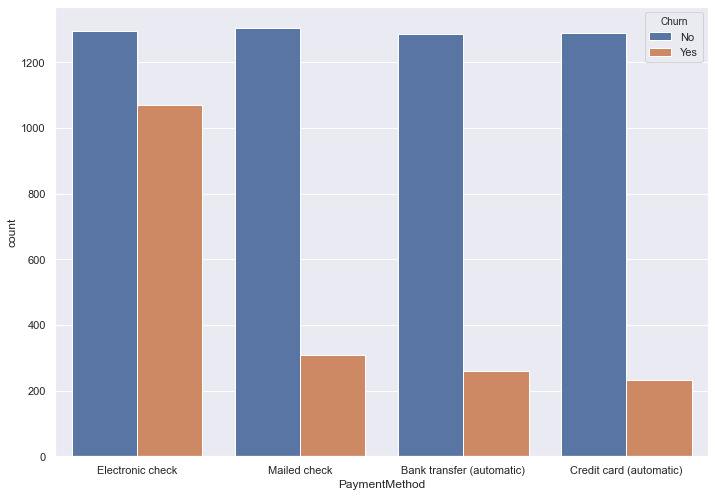

In [60]:
#PaymentMethod vs churn graph
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='PaymentMethod', hue='Churn', data=data)

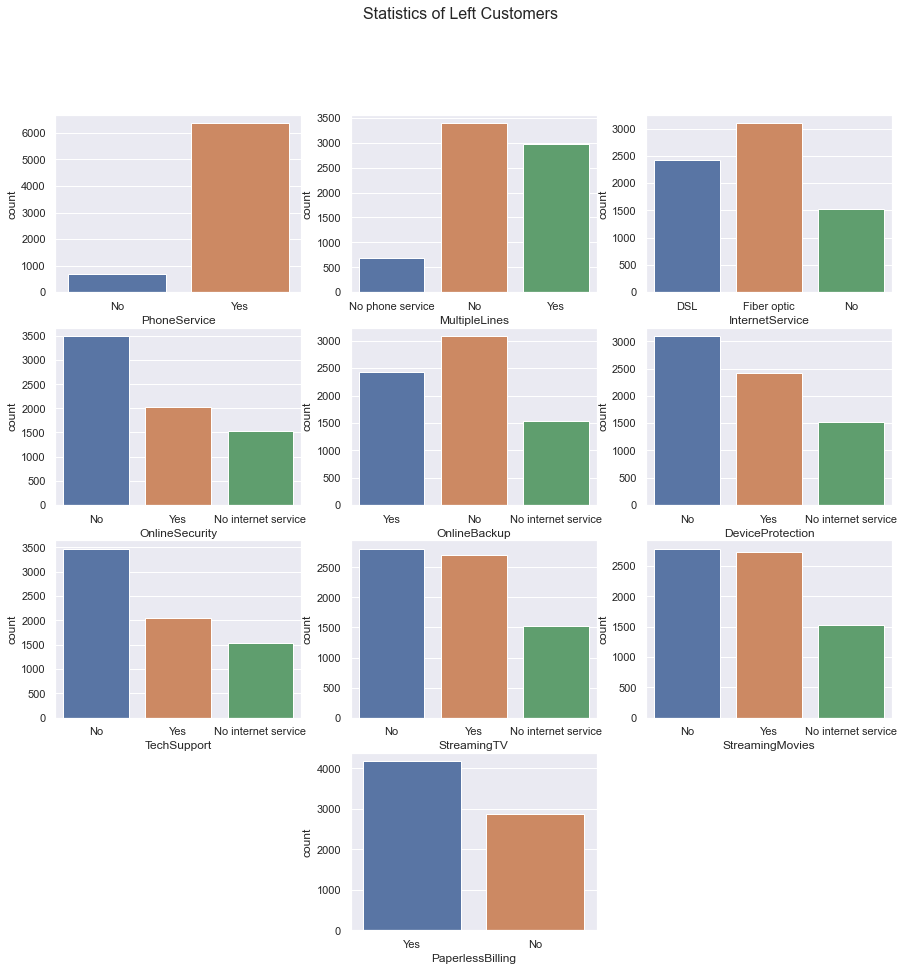

In [68]:
#cheking the churn for al of the variables in our dataset
plt.figure(figsize = (15,15))
plt.suptitle('Statistics of Left Customers',fontsize = 16)

plt.subplot(4,3,1)
sns.countplot(data.PhoneService)

plt.subplot(4,3,2)
sns.countplot(data.MultipleLines)

plt.subplot(4,3,3)
sns.countplot(data.InternetService)

plt.subplot(4,3,4)
sns.countplot(data.OnlineSecurity)

plt.subplot(4,3,5)
sns.countplot(data.OnlineBackup)
            
plt.subplot(4,3,6)
sns.countplot(data.DeviceProtection)

plt.subplot(4,3,7)
sns.countplot(data.TechSupport)

plt.subplot(4,3,8)
sns.countplot(data.StreamingTV)

plt.subplot(4,3,9)
sns.countplot(data.StreamingMovies)

plt.subplot(4,3,11)
sns.countplot(data.PaperlessBilling)
plt.show()




Conclusion:
What all did you understand from the above charts

As for the above chart the conclusion is-

-There is no outlier in the dataset.

-The second graph shows the churn rate of the dataset which show a big diffence.

-The third chart shows that senior citizen are likely to got churn easily.

-The fourth chart shows that the customer having monthly contract are most likely to got churn as compared to the two year contract.

-The fifth graph shows that the credit card automatic transaction sounds good for the company. the customer is very much satisfied with the onlie transaction.

The group of chart shows that-

-If the company offer the device protection the customers are more likely to not got churn.

-Having a good tech support holds teh customers. 

There are many more things left to be explored.

# Implement Machine Learning Models

Logistic Regression Model

In [581]:
from sklearn.linear_model import LogisticRegression as lr
clf = lr(random_state=42,multi_class='multinomial')  #solver=lbfgh is gradient decent
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [583]:
clf.score(X_test, y_test)

0.8029528676888131

In [582]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train,y_train ,cv=6, scoring="accuracy").mean()

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

0.7987458294637637

The accuracy on test data of LogisticRegression model is 80% 
and the mean for K-fold cross validation is 79
Let us have a look at the accuracy of our second model which is Random forest

In [577]:
#Predicting trest dataset
pred=rnd_clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [573]:
from sklearn import metrics

In [578]:
metrics.f1_score(y_test,pred)

0.5132275132275131

In [393]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
parameters = { 'min_samples_leaf':[1,2,3,4,5], 'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [394]:
grid.best_params_

{'max_leaf_nodes': 10, 'min_samples_leaf': 4}

Random Forest

Here I am using Random Forest algorithm and for the hyperparameter I have used grid search on the dataset.

In [575]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=200, min_samples_split=7, max_leaf_nodes=10, min_samples_leaf=4)
rnd_clf.fit(X_train, y_train) 

RandomForestClassifier(max_leaf_nodes=10, min_samples_leaf=4,
                       min_samples_split=7, n_estimators=200)

In [584]:
rnd_clf.score(X_test,y_test)

0.7910278250993753

In [585]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf,X_test,y_test ,cv=10, scoring="accuracy").mean()

0.798398176682075

The accuracy on test data of KNN model is 79% and the mean for K-fold cross validation is 79 most similer to previous algorithm.

# Model Evaluation

Logistic Regression

In [586]:
#using simple score method on test data
clf.score(X_test, y_test)

0.8029528676888131

In [588]:
#K-fold cross validatio on test data
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_test,y_test ,cv=6, scoring="accuracy").mean()

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

0.8057625780687703

In [598]:
#Predicting trest dataset using F1 SCORE
from sklearn import metrics
pred=clf.predict(X_test)
metrics.f1_score(y_test,pred)

0.5941520467836257

In [591]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [595]:
#confusion Matrix
matrix = confusion_matrix(y_test,pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 194  285]
 [  83 1199]]


True Positive (TP) = 194; meaning 194 positive class data points were correctly classified by the model

True Negative (TN) = 1199; meaning 1199 negative class data points were correctly classified by the model

False Positive (FP) = 285; meaning 285 negative class data points were incorrectly classified as belonging to the positive class by the model

False Negative (FN) = 83; meaning 83 positive class data points were incorrectly classified as belonging to the negative class by the model

Random Forest

In [596]:
#using simple score method on test data
rnd_clf.score(X_test, y_test)

0.7910278250993753

In [597]:
#K-fold cross validatio on test data
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf,X_test,y_test ,cv=6, scoring="accuracy").mean()

0.8000975134080935

In [601]:
#Predicting trest dataset using F1 SCORE
from sklearn import metrics
pred_clf=rnd_clf.predict(X_test)
metrics.f1_score(y_test,pred)

0.5132275132275131

In [602]:
#confusion Matrix
matrix = confusion_matrix(y_test,pred_clf, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 194  285]
 [  83 1199]]


# Final Conclusions

As we have finished training our 2 model what we have analysed is that the accuracy summary of the 2 model is almost same.

-Random forest-79%

-Logistic Regression-80%

So the accuracy is almost same in each case now I would like to choose Logistic regression model beacause of its high value in f1 score as compared to other model.
This finishes our project. We have built a Logistics regression classifier that performs reasonably well but it cannot be used in real world.




I AM STILL LEARNING :)